<a href="https://colab.research.google.com/github/guilleib227/Big-Data-Colab-UCN-/blob/main/K_Means_y_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering con K-Means

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#%matplotlib inline #permite graficar en la linea dependiendo de la version

In [ ]:
vinos = pd.read_csv('/content/caracteristicas de vinos.csv')

In [ ]:
vinos

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,174,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,175,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,176,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,177,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Vino             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
vinos2 = vinos.drop(['Vino'], axis=1) #indicando que se trata de una columna

In [ ]:
vinos2.describe() #revisamos valores estadisticos

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Tenemos que normalizar los valores de las caracteristicas
Para obtener una conversion dentro del mismo rango

Restamos a cada celda el valor minimo de la columna y lo dividimos entre el maximo de la columna y el minimo de esa columna

teniendo todas las columnas un valor min = 0 y max = 1

In [ ]:
vinos_norm = (vinos2 - vinos2.min())/(vinos2.max()-vinos2.min())

vinos_norm

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


## Buscando cantidad optima de Clusters Metodo del codo
calculamos que tan similares son los individuos dentro de los cluster
Utilizamos el metodo del codo
realizando la suma de los cuadrados dentro de cada grupo o wcss

In [ ]:
wcss = []
for i in range (1,11):    #asignamos un ciclo for para indicar un max de clusters a analizar, agregamos 10 clusters maximos a analizar
    kmeans = KMeans(n_clusters = i, max_iter=300)   # creamos un modelo con metodo kmeans utilizando la funcion kmeans indicando en parentesis que la cantidad de clusters cambiara dependiendo de i, ademas realizando 300 interacciones por numero de cluster 
    kmeans.fit(vinos_norm)    #aplicamos kmeans en el dataframe guardando las caracteristicas normalizadas, aplicando la funcion fit al objeto del modelo kmeans anterior
    wcss.append(kmeans.inertia_) #obtenemos el valor de wcss que se encuentra en inertia_ dentro del modelo kmeans

Graficamos el codo

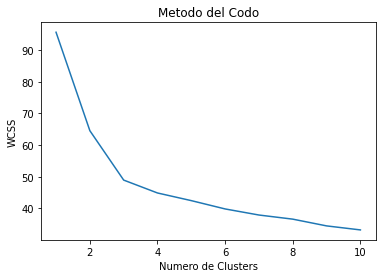

In [ ]:
plt.plot(range(1,11),wcss)
plt.title("Metodo del Codo")
plt.xlabel("Numero de Clusters")
plt.ylabel("WCSS") # WCSS es el indicador que nos muestra que tan similar son los individuos dentro de los clusters
plt.show()

## Aplicamos el m{etodo K-means

In [ ]:
clustering = KMeans(n_clusters=3,max_iter=300)#se crea modelo y se guarda en el objeto clustering
clustering.fit(vinos_norm) #se aplica el modelo creado al objeto guardado con datos normalizados aplicando la funcion fit que se encuetna en clustering

KMeans(n_clusters=3)

##Agregamos la clasificacion al archivo original
estamos agregando la clasificacion que se realizo en la tabla con datos normalizados, a una nueva columna en la tabla original

In [ ]:
vinos['KMeans_Clusters'] = clustering.labels_
vinos.head() #Visualizamos la ultima tabla agregada al frame original indicando a que cluster pertenecen

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KMeans_CLusters,KMeans_Clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,1
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,1
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,1
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1


## Realizamos un analisis de componentes principales PCA
Con el fín de reducir la cantidad de variables analizadas creando una nueva cantidad representando a las variables originales, esto se da porque no es posible graficar datos en muchas dimensiones

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #indicamos que queremos 2 componentes o variables y lo guardamos en el objeto pca
pca_vinos = pca.fit_transform(vinos_norm)
pca_vinos_df = pd.DataFrame(data = pca_vinos, columns = ['Componente_1', 'Componente_2'])
pca_nombresVinos = pd.concat([pca_vinos_df, vinos[['KMeans_Clusters']]],axis=1)

pca_nombresVinos

,Componente_1,Componente_2,KMeans_Clusters
0,-0.706336,-0.253193,1
1,-0.484977,-0.008823,1
2,-0.521172,-0.189187,1
3,-0.821644,-0.580906,1
4,-0.202546,-0.059467,1
...,...,...,...
173,0.739510,-0.471901,2
174,0.581781,-0.348366,2
175,0.626313,-0.546857,2
176,0.572991,-0.425516,2


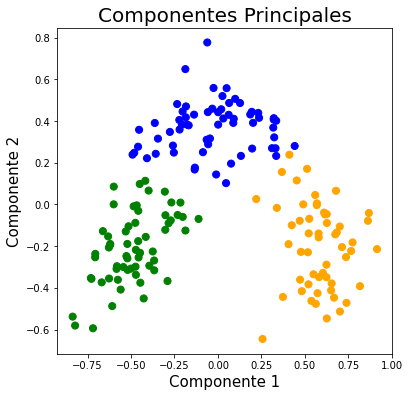

In [ ]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme = np.array(["blue", "green", "orange"])
ax.scatter(x = pca_nombresVinos.Componente_1, y = pca_nombresVinos.Componente_2, c=color_theme[pca_nombresVinos.KMeans_Clusters], s=50)
plt.show()

## Grabando los lcusters realiazdos

In [ ]:
vinos.to_csv('')